### Social Media has tonnes of data that can be analyzed! Here's a few examples of Sentiment Analysis being applied to the tweets.

### Twittter Authentication

In order to retrieve Twitter data, you will need to register as a Twitter Developer:
- Register on https://developer.twitter.com/ and click on 'Create New App'
- Fill in the application details and await the approval (you can leave the callback url blank).
- Once the App is created, go back to the app page and open 'Keys and Access Tokens' tab
- There will be 4 key codes to be copied: Consumer API key, Consumer API secret key, Access token and Access token secret (these will be used in the Python code).

### Pre-requisites

Prior to running code in Python, we need to install tweepy. It is the python client for the official Twitter API. It pulls the tweets from twitter.

> python -m pip install tweepy

Once complete, you can switch back to Jupytor notebooks.

In [1]:
# Importing libraries
import tweepy
import re 
from twython import Twython

In [2]:
#Twitter Authentication Keys

In [3]:
# consumer_key = 'XXXXXXXXXXXXXXXXXXXXXXXX'
#consumer_secret = 'XXXXXXXXXXXXXXXXXXXXXXXXXXXX'
#access_token = 'XXXXXXXXXXXXXXXXXXXXXXXXXXXX'
#access_token_secret = 'XXXXXXXXXXXXXXXXXXXXXXXXX'

In [12]:
# Creating the authentication object
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
# Setting your access token and secret
auth.set_access_token(access_token, access_token_secret)
# Creating the API object while passing in auth information
api = tweepy.API(auth) 

In [13]:
# Connect to Twitter
twitter = Twython(consumer_key, consumer_secret)

In [14]:
tweets = api.user_timeline('@realDonaldTrump', count=5, tweet_mode='extended')
for t in tweets:
    print(t.full_text)
    print()

Been fully briefed on earthquake in Southern California. All seems to be very much under control!

Looks like a lot of people already heading to SALUTE TO AMERICA at Lincoln Memorial. It will be well worth the trip and wait. See you there at 6:00 P.M. Amazing music and bands. Thank you ARMY!

Great news for the Republican Party as one of the dumbest &amp; most disloyal men in Congress is “quitting” the Party. No Collusion, No Obstruction! Knew he couldn’t get the nomination to run again in the Great State of Michigan. Already being challenged for his seat. A total loser!

RT @TheOfficerTatum: What I have seen from the last two nights isn't America.

These candidates are disgraceful. All I saw was pandering.…

RT @RealCandaceO: You cannot be a victim and a victor at the same time. 

You can either choose to win or accept your status as a loser.…



In [15]:
def list_tweets(user_id, count, prt=False):
    tweets = api.user_timeline(
        "@" + user_id, count=count, tweet_mode='extended')
    tw = []
    for t in tweets:
        tw.append(t.full_text)
        if prt:
            print(t.full_text)
            print()
    return tw

In [16]:
user_id = 'realDonaldTrump' 
count=200
tw_trump = list_tweets(user_id, count)

In [17]:
tw_trump[11]

'Iran has just issued a New Warning. Rouhani says that they will Enrich Uranium to “any amount we want” if there is no new Nuclear Deal. Be careful with the threats, Iran. They can come back to bite you like nobody has been bitten before!'

In [18]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)        
    return input_txt
def clean_tweets(lst):
    # remove twitter Return handles (RT @xxx:)
    lst = np.vectorize(remove_pattern)(lst, "RT @[\w]*:")
    # remove twitter handles (@xxx)
    lst = np.vectorize(remove_pattern)(lst, "@[\w]*")
    # remove URL links (httpxxx)
    lst = np.vectorize(remove_pattern)(lst, "https?://[A-Za-z0-9./]*")
    # remove special characters, numbers, punctuations (except for #)
    lst = np.core.defchararray.replace(lst, "[^a-zA-Z#]", " ")
    return lst

In [19]:
analyser.polarity_scores(tw_trump[11])

{'neg': 0.151, 'neu': 0.768, 'pos': 0.081, 'compound': -0.5562}

Here's a negative tweet by Donald Trump!

Let's check a random tweet by Donald Trump...

In [22]:
tw_trump[157]

'I never called the strike against Iran “BACK,” as people are incorrectly reporting, I just stopped it from going forward at this time!'

In [23]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)        
    return input_txt
def clean_tweets(lst):
    # remove twitter Return handles (RT @xxx:)
    lst = np.vectorize(remove_pattern)(lst, "RT @[\w]*:")
    # remove twitter handles (@xxx)
    lst = np.vectorize(remove_pattern)(lst, "@[\w]*")
    # remove URL links (httpxxx)
    lst = np.vectorize(remove_pattern)(lst, "https?://[A-Za-z0-9./]*")
    # remove special characters, numbers, punctuations (except for #)
    lst = np.core.defchararray.replace(lst, "[^a-zA-Z#]", " ")
    return lst

In [24]:
analyser.polarity_scores(tw_trump[157])

{'neg': 0.097, 'neu': 0.842, 'pos': 0.061, 'compound': -0.2076}

Slightly negative tweet from Donald Trump!

In [25]:
# Get timeline 
user_timeline=twitter.get_user_timeline(screen_name='realDonaldTrump',count=1) 
#get most recent id
last_id = user_timeline[0]['id']-1
for i in range(16):
    batch = twitter.get_user_timeline(screen_name='realDonaldTrump',count=200, max_id=last_id)
    user_timeline.extend(batch)
    last_id = user_timeline[-1]['id'] - 1

In [26]:
# Extract textfields from tweets
raw_tweets = []
for tweets in user_timeline:
    raw_tweets.append(tweets['text'])

In [27]:
#Cleaning the data - Create a string form of our list of text
raw_string = ''.join(raw_tweets)
no_links = re.sub(r'http\S+', '', raw_string)
no_unicode = re.sub(r"\\[a-z][a-z]?[0-9]+", '', no_links)
no_special_characters = re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t]) |(\w+:\/\/\S+)", '', no_unicode)

In [28]:
clean_tweets = no_special_characters
clean_tweets

'Weather looking goodclearing rapidly and temperatures going down fastSee you in 45 minutes6:30 to 7:00 P.Mat Lincoln Memorial!Been fully briefed on earthquake in Southern CaliforniaAll seems to be very much under control!Looks like a lot of people already heading to SALUTE TO AMERICA at Lincoln MemorialIt will be well worth the trip news for the Republican Party as one of the dumbest &ampmost disloyal men in Congress is “quittingthe Party. What I have seen from the last two nights isn\'t America.\n\nThese candidates are disgracefulAll I saw was pandering.…RT You cannot be a victim and a victor at the same time\n\nYou can either choose to win or accept your status as a loser.…....and advanced aircraft anywhere in the WorldPerhaps even Air Force One will do a low &amploud sprint over the cr are coming from far and wide to join us today and tonight for what is turning out to be one of the biggest c 4TH OF JULY!So important for our Country that the very simple and basic “Are you a Citizen

Let's see if the twitter account is a positive, neutral or negative person..

Note: This may take a few mins to run as the text string contains alot of words!

You can check a section of the 200 tweets and run the sentiment analysis on it:

In [29]:
clean_tweets[109:520]

"Lincoln Memorial!Been fully briefed on earthquake in Southern CaliforniaAll seems to be very much under control!Looks like a lot of people already heading to SALUTE TO AMERICA at Lincoln MemorialIt will be well worth the trip news for the Republican Party as one of the dumbest &ampmost disloyal men in Congress is “quittingthe Party. What I have seen from the last two nights isn't America.\n\nThese candidates a"

In [30]:
analyser.polarity_scores(clean_tweets[109:520])

{'neg': 0.044, 'neu': 0.789, 'pos': 0.167, 'compound': 0.8011}

You can also run Sentiment Analysis on the entire 200 cleaned tweets. This may take some time to run.

In [31]:
#Sentiment Analysis on all recent 200 tweets by Donald Trump
analyser.polarity_scores(clean_tweets)

{'neg': 0.1, 'neu': 0.737, 'pos': 0.164, 'compound': 1.0}

The compound score is 1.0 which means Donald Trump's 200 tweets were surprisingly leaning towards positive than negative!

## Findings Hashtags in Twitter

In [32]:
from tweepy import Cursor

# Define the search term and the date_since date as variables
search_words = "#Sudan"
new_search = search_words + " -filter:retweets" #excluding retweets
new_search

date_since = "2019-01-01"

In [33]:
# Collect tweets
tweets = tweepy.Cursor(api.search,
              q=new_search, #search_words,
              lang="en",
              since=date_since).items(1000)

# Iterate on tweets
for tweet in tweets:
    print(tweet.text)

Stop the deadly attacks on protesters in #Sudan. Take action to stop the military crackdown before more lives are l… https://t.co/85L0rWaepE
#Sudan 🇸🇩: hundreds of people are out in the city of #Sennar tonight to protest the #TMC regime https://t.co/woShKhsd85
Letter submitted by Sudanese and Eritreans to EU regarding EU support for the violence in #Sudan https://t.co/f5IgPbtjBw
#Sudan "Barmeepman, an newly coined Arabic revolutionary term, meaning barrelman or drumsman, someone who sets the… https://t.co/FHfO9JEPrY
ACLED records sporadic #RSF activity since the start of #Sudan's protest movement, w/ a spike mid-May. The timing o… https://t.co/RrWhPApHKX
The protests continue in #Sudan. This unrest is an indication that the people will not rest until a civilian led go… https://t.co/pCcwlw5r1Z
The people of #Sudan stand with the people of #Venezuela 
#IAmTheSudanRevolution https://t.co/tPoXFNruqe
#Sudan : The ruling generals and the leaders of the protest met on Thursday for a second da

So the #Sudan military spokesman says social media is "insecure" and will continue blocking the Internet. SMH.
His… https://t.co/4vul8SBXKB
I still can't believe that a country can be completely cut off from internet #Sudan #SudanUprising
This is literally what Sudanese in the diaspora are going through. #IAmTheSudanRevolution #BlueForSudan… https://t.co/Ir7gCS3TQv
Those are the Youth of Sudan! Those are the future! The most resilient protesters! #IAmTheSudanRevolution… https://t.co/8LBfQLYqdh
#VOA South Sudan on High Alert for Ebola Virus https://t.co/J2DyuNthVF #Sudan #Soudan
Thank you, @MehreenFaruqi! Please continue to use your platform to raise awareness and support the people of Sudan!… https://t.co/xJtRCJhQjY
How does an internet blackout truly affect people? 📲 Engage your students to reflect on the impact of one as big as… https://t.co/zRv1uxA9k6
#Hemedti is a warlord! #IAmTheSudanRevolution #BlueForSudan #SudanUprising #SudanMassacre #Sudan… https://t.co/Ms9XgbgnjV
Alaa Salah 

#BREAKING 

#Sudan TMC and DFCF agreed: 50% legislative council for DFCF, 50% for other groups; 18 Ministers; 5 mil… https://t.co/Y44N3CJxXt
#Reliefweb Sudan: Sudan’s Popular Uprisings: Where South Sudan Stands https://t.co/iL5GT9lul3 #Sudan #Soudan
@IslamistRed @sallyrugg Let's ask the Sudanese youth: were you more depressed under Bashir or now in waging a peace… https://t.co/n95XD1UIO4
heres more info on the current situation in #Sudan !!!

https://t.co/C4AlFpbk8U https://t.co/z9Pc2tZLnN
Yesterday, the world felt what Sudan has been feeling for a long time and i guess it just started to dawn on people… https://t.co/2tFFRhRlKl
At the #HRC41, @P4HR delivered an oral intervention on the need for action from the #UN human rights council on the… https://t.co/Fgjt5PGtPu
UAE wants Sudan's army and protesters to continue dialogue and avoid violence 🙏
#Stop_Spreading_Rumors… https://t.co/YVRYJfl0Lx
Yo @JColeNC after you’re done in NYC on the 4th, you free to stop in DC and talk about an idea 

“I’m against all of the laws of this regime”: What #Sudan’s women want https://t.co/LUmTBXmwah
🇸🇩 In #Sudan, protest leaders have set a 72-hour deadline to negotiate a transitional council intended to restore p… https://t.co/yD1lxTux2F
@sabitijoseph @HEBobiwine On the Contrary, #Ugandan Patriots have a duty to resist brainwashed Brigadiers such as t… https://t.co/kmApn7FqAl
I have not been on @Twitter since the end of last year. Accessing my account this morning had me realize how the bl… https://t.co/xrsTkcISDT
Everything you want to know @ the #history of #cotton, in our new volume https://t.co/b0hOi5o0N3 Ed.  Charlène Bouc… https://t.co/Jruxj71b0A
#TheConversation Not everyone uses a toothbrush and toothpaste to clean their teeth – here's what science says abou… https://t.co/oLf3XsO2Nr
Protests in #Sudan continue amid crackdown and internet blackout https://t.co/UUJCLwq3uC 

#SudanUprising… https://t.co/b4VJZLTrw9
Dear @Twitter 
Why do we see thousands of fake twitter accounts made 

@AhmedAb45273759 Ugh, I know--I feel responsibility to keep tweeting for beloved #Sudan, but the mass stupidity is… https://t.co/u1aDnH3Uvl
Internet Restrictions, Violence a 'Recipe for Disaster' - UN: https://t.co/IKCzDZaOI7 #Sudan #SudanProtests… https://t.co/Qy7dar746Z
Good morning, Khartoum. #Sudan https://t.co/r4oIadvY6D https://t.co/Ds3bH7Cyty
Who attends the #Military_Council and #Hamity political rallies in #Sudan: The answer is simple..mostly #Janjaweed… https://t.co/XM9S6ggwat
For 30 years, Omar Al Bashir survived coups attempts, rebellions &amp; war. Insiders argue his downfal in April this mo… https://t.co/HEVRm2RfvM
#Sudan in revolt is deja-vu for #Egyptians driven out by repression

Read more: https://t.co/KN6Zku0K8L 

#GeoNews

https://t.co/50MGwSdlhW
Talks between three generals from the ruling military council and five protest leaders resumed in Khartoum on Wedne… https://t.co/Y3ARABMeFQ
#Mozambique says militants kill 11 in attack near #Tanzania border

Wanted militan

@AsstSecStateAF @statedeptspox @StateDept @USEmbassyKRT Thank you very nuch for your support the people of #Sudan a… https://t.co/Kvc5h6CqPu
😭😭😭 I can’t breathe, this is just too much #GodBlessHorners #TheHornIsLit #IfYouNotHip #TheHornOfAfrica #Drip… https://t.co/eeMHVqlTfN
#Sudan: Generals in power and leaders of the dispute have begun negotiations to discuss the transition, the first m… https://t.co/llJfy5TAfr
It’s a wrap for this South  Sudanese Beauty “Chol Bading “ on set shooting with Universal Standard 
@ipmmodels… https://t.co/fPeVCug6D8
#Sudan protesters, generals resume talks over civilian rule  https://t.co/aUB9qQE7aM https://t.co/J3hgIWjHea
Good morning #Eritrea! We the people of #Eritrea and #Sudan must stand together. The power of people is much more g… https://t.co/bZcIwMVW4O
Without real power for a civilian authority in #Sudan, the scene will be set for a future military takeover. ISS To… https://t.co/RKdLyOP67C
MONDAY: Tune in for live updates of our UN #HRC41 side e

“Blue Out on Instagram,” How to #support #Sudan through #socialmedia. #protest #activism #Africa #Shahd… https://t.co/hnlA0vnU6k
@SibaAlsadig @Joyce_Karam @ayaelb another thing about you 
you have a blue avatar witch support #MuslimBrotherhood… https://t.co/tCzNr4gMWM
#IAmTheSudanRevolution #BlueForSudan #SudanUprising #SudanMassacre #Sudan
WATCH: Sudan protesters flood capital to… https://t.co/5QXbDTbxYc
#Ebola case reported not far from #South #Sudan border
 https://t.co/eqfFZLRxP7
How much did that cost from the 6 mil USD paid to that dictator supporting company? That’s how he will appeal to th… https://t.co/JgCm7GwvXP
#AlJazeera Sudan protesters agree to direct talks with military council https://t.co/rgkuwWHJFH #Sudan #Soudan
LATEST BLOG | The turmoil in #Sudan is down to General Hemedti, leader of the #Janjaweed.

Since Bashir was ousted,… https://t.co/1jdAN3eHii
#Sudan’s protest leaders have agreed to hold direct talks with the military after @_AfricanUnion and #Ethiopian med… h

#UN Rights Chief decries grave human rights crimes by #Sudan armed forces &amp; impunity for atrocities.

Calls for inv… https://t.co/HIoHgRJlm1
#Sudan stop oppression and murder of peaceful protestors. Reopen internet access and allow freedom of expression an… https://t.co/qpqH7KyurO
#Sudan Protesters at a Crossroads After Deadly Crackdown https://t.co/wEeU3KWrjj https://t.co/C18RyTQrNk
Likely among the topics of discussion when #Sudan's deputy leader visited #Eritrea this week... https://t.co/simuz6LIMx
I can add #Bahrain and #Yemen,  but also #Somalia and #Sudan. 
The list is so long about such democracy.
"Birds of the same feather flock together." No wonder Isaias is working day and night to enlighten those killer gen… https://t.co/Tvu4kfeeIh
#Sudan #UAE 
"In the days before the coup, these sources said, Gosh made at least one phone call to intelligence of… https://t.co/8yipcd1KeD
“restrictions, unmet promises &amp; bouts of unbridled violence which are neither investigated nor pun

Inspiring meeting with Dr Nahid Toubia from @irhrsudan - working together to support women in Khartoum 🤲 💛… https://t.co/CLAlls3HmT
#ICC / #Sudan &gt; Getting #AlBashir would require collaboration with the current military regime led by officers invo… https://t.co/ojmd6VYNT9
Yes, dictator #isaias does not want to see democracy next door. 
#sudan people know your enemy.
#SudanMassacre… https://t.co/jpJP1qgGB0
Not to be missed, but sadly I can't be there. Well worth going for the latest insights on the ongoing turmoil in… https://t.co/bbe3Je5Qsw
If it was not for his lack of vision of what was taking over Sudan, Omar Hassan al-Bashir’s three-decade-long leade… https://t.co/0SXZHfVfxH
@Reuters #Sudan Enlightens us with the usual Reuters themes: #UAE is bad, #SaudiArabia is bad, #Egypt is bad,… https://t.co/CaZC5rhdGC
A new contingent of 61 Army personnel including 11 Officers under the Phase 6 of the UN Mission of South Sudan (UNM… https://t.co/7qNFIV2mWE
#Eritrea Reopens Border With #Sud

In Sudan, women demand freedom … again! https://t.co/Imr2pnj9PS #Sudan #SudanUprising #StandWithSudan @GW_WGSS
Where is the global outrage at the massacre of the innocents in Sudan? https://t.co/AaToAiUNtO #Sudan #SudanUprising #StandWithSudan
.@AustraliaUN_GVA using their Item 4 GD statement to highlight, among other things, the importance of upholding the… https://t.co/ysLaePL8nt
“I’m against all of the laws of this regime”: What Sudan’s women want https://t.co/zXhGnbFmac #Sudan #SudanUprising #StandWithSudan
#MENA #migration trends @ArabBarometer's excellent survey: compared to 2013, in 2018/19 more (up to &gt;40%) of respon… https://t.co/dUSb4EWE4k
Sudan Needs your anger ~ Our People are being raped and killed @MetroUK #HumanitarianCrisis #SudanUprsinig #sudan… https://t.co/eMZPHWwU4x
Very interesting and rich discussion of recent events in #Sudan. https://t.co/J5DSgRSxrx
30th of June was great &amp; may Allah have mercy upon our martyrs, 

Could we find another options ??

- the N

How do dictators survive: by  befriending other dictators, especially those neighboring ones. That is DIA of… https://t.co/M4x2eBxh2x
Oh my goodness, this is so incredibly disheartening and appalling. Asylum seekers from #Sudan and #Eritrea account… https://t.co/3DfemLBqQk
Mobile Payments Style Ridesharing Operation @Careem Pulls Out of #Sudan https://t.co/SqFdmUmH1D @Uber, #mobilepayments, #ridesharing
“#Sudan's tragic role in #Yemen's civil war“ https://t.co/7jhg8QsO4b
Stop the deadly attacks on protesters in #Sudan. Take action to stop the military crackdown before more lives are l… https://t.co/5styylJTWF
Stop the deadly attacks on protesters in #Sudan. Take action to stop the military crackdown before more lives are lost!
Janjaweed occupation
France 24 https://t.co/dFJPdRKDvj

#مواكب_يوليو_الظافرة
#مليونيات_يوليو_الظافره
#blueforsudan… https://t.co/oEVGCz4DUq
@Xochitl89 @seriousssam And the world just sits back and lets it happen... #Sudan #BLM #SudanUprising
Stop the deadly attac

In [34]:
# Collect tweets
tweets = tweepy.Cursor(api.search,
              q=new_search, #search_words,
              lang="en",
              since=date_since).items(1000)

for tweet in tweets:
    print(tweet.user.location)


Amsterdam, the Netherlands
Evanston, IL
Evanston, IL




flatland - 2D /wiki/Flatland
Amsterdam, the Netherlands
London
Amsterdam, the Netherlands

Amsterdam, the Netherlands

Amsterdam, the Netherlands

Amsterdam, the Netherlands


Suva, Fiji.
Amsterdam, the Netherlands


Sudan
Sydney - LA - The World
Sudan
Sudan
Sudan
Brussels, Belgium
Indonesia
San Francisco, CA
Mekelle 
England, United Kingdom
Upper Sackville, Nova Scotia

KSA
Indonesia
Africa/US/UK
Copenhagen, Denmark
Surrey, B.C., Canada
Oslo, Norge



İstanbul, Türkiye
Berlare
https://eastafricamonitor.com/
Victoria, BC
Brussels, Belgium
Brooklyn, NY
Beirut
South Orange, New Jersey
Birmingham
Geneva, CH & Kampala, UG
USA
Geneva, CH & Kampala, UG
Behind you
London
Sudan
Indonesia
Indonesia

London
Copenhagen, Denmark
Nairobi, Kenya


Greater Knockan, Sutherland/Kilkenny

Düsseldorf vs. Berlin
Saudi Arabia
Toronto, Canada
Dar es Salaam, Tanzania

Evanston, IL
Brussels, Belgium
Africa
England
Toronto / Ottawa / The Red Sky
Nairobi

Dubai, UAE
Cairo , Egypt 

Africa
planet Earth
Khartoum
Khartoum
London, United Kingdom
Charlotte, NC

Brussels, Belgium


The Hague, The Netherlands
Manchester,UK
Ankara, Türkiye

London


Tunis
Nigeria
Addis Ababa, Ethiopia
Addis Ababa, Ethiopia

Africa

Pyrénées Orientales
FinalCall.com 

Vauxhall, London

Ghana
Addis Ababa, Ethiopia

Brussels, Belgium
South Africa


Singapore

Africa
Istanbul, Turkey
Brussels, Belgium
Namibia
world
London, UK
Zürich, Switzerland


New York, Geneva
Soudan
Brussels, Belgium

Addis Ababa, Ethiopia
London, UK
DC/Cape Town
DC/Cape Town

DC/Cape Town
Bonn, Deutschland
London
London, England
South & North Sudan
S-Burgenland
Geneva, CH & Kampala, UG
New York, Geneva
Dubai, United Arab Emirates
Europe/Arabia/World
Give voice to the voiceless.
Khartoum
Europe/Arabia/World
Dubai, United Arab Emirates

New York, NY

Helsinki, Finland

Brussels, Belgium
ADDIS ABABA, ETHIOPIA
South Africa
Indonesia
Indonesia
Limpopo, South Africa
Indonesia
Ethiopia
FinalCall.com

In [39]:
from pathlib import Path
import json

# Define the search term and the date_since date as variables
search_words = "#Sudan"
new_search = search_words + " -filter:retweets" #excluding retweets
new_search

date_since = "2019-01-01"

# Collect tweets
search_tweets = tweepy.Cursor(api.search,
              q=new_search, #search_words,
              lang="en",
              since=date_since).items()


ds_tweets_save_path = "Tweets_Sudan.json"
# Guarding against attempts to download the data multiple
# times:
if not Path(ds_tweets_save_path).is_file():
    # Getting as many recent tweets by @BerkeleyData as Twitter will let us have.
    # We use tweet_mode='extended' so that Twitter gives us full 280 character tweets.
    # This was a change introduced in September 2017.
    
    # The tweepy Cursor API actually returns "sophisticated" Status objects but we 
    # will use the basic Python dictionaries stored in the _json field. 
    Tweets_Sudan = [t._json for t in search_tweets]
    
    # Saving the tweets to a json file on disk for future analysis
    with open(ds_tweets_save_path, "w") as f:        
        json.dump(Tweets_Sudan, f)

# Re-loading the json file:
with open(ds_tweets_save_path, "r") as f:
    for line in f.readlines():
        Tweets_Sudan.append(json.loads(line))#=json.load(f)

In [41]:
# Looking at one tweet object, which has type Status: 
from pprint import pprint # ...to get a more easily-readable view.
pprint(Tweets_Sudan[0])

{'contributors': None,
 'coordinates': None,
 'created_at': 'Fri Jul 05 00:08:03 +0000 2019',
 'entities': {'hashtags': [{'indices': [0, 9], 'text': 'Breaking'},
                           {'indices': [11, 17], 'text': 'Sudan'}],
              'symbols': [],
              'urls': [{'display_url': 'youtube.com/watch?v=jL8uDJ…',
                        'expanded_url': 'https://www.youtube.com/watch?v=jL8uDJJBjMA',
                        'indices': [32, 55],
                        'url': 'https://t.co/mEaSrlLDOf'}],
              'user_mentions': []},
 'favorite_count': 0,
 'favorited': False,
 'geo': None,
 'id': 1146933725831290882,
 'id_str': '1146933725831290882',
 'in_reply_to_screen_name': None,
 'in_reply_to_status_id': None,
 'in_reply_to_status_id_str': None,
 'in_reply_to_user_id': None,
 'in_reply_to_user_id_str': None,
 'is_quote_status': False,
 'lang': 'en',
 'metadata': {'iso_language_code': 'en', 'result_type': 'recent'},
 'place': None,
 'possibly_sensitive': False,
 'r

In [42]:
print(len(Tweets_Sudan))

869


In [43]:
tweet_files = ['Tweets_Sudan.json']
Tweets_Sudan2 = []
for file in tweet_files:
    with open(file, 'r') as f:
        Tweets_Sudan2=json.load(f)

In [44]:
print(Tweets_Sudan2[0])

{'created_at': 'Fri Jul 05 00:08:03 +0000 2019', 'id': 1146933725831290882, 'id_str': '1146933725831290882', 'text': '#Breaking: #Sudan deal reached? https://t.co/mEaSrlLDOf', 'truncated': False, 'entities': {'hashtags': [{'text': 'Breaking', 'indices': [0, 9]}, {'text': 'Sudan', 'indices': [11, 17]}], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/mEaSrlLDOf', 'expanded_url': 'https://www.youtube.com/watch?v=jL8uDJJBjMA', 'display_url': 'youtube.com/watch?v=jL8uDJ…', 'indices': [32, 55]}]}, 'metadata': {'iso_language_code': 'en', 'result_type': 'recent'}, 'source': '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>', 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 1566929143, 'id_str': '1566929143', 'name': "Dr. EJ O'Dell", 'screen_name': 'emilyjodell', 'location': 'Occupied Long Tidal River', 'description': "Resident Fell

In [46]:
import pandas as pd

for tweets in Tweets_Sudan2:
    if 'full_text' in tweets.keys():
        tweets['text'] = tweets.pop('full_text')

sudan = pd.DataFrame(Tweets_Sudan2).set_index(['id']).sort_index()
#trump['created_at'] = trump['created_at'].apply(time.strptime, args=('%a %b %d %X %z %Y',))
#date_series = date_string.apply(datetime.strptime, args=('%Y-%m-%d %H:%M:%S'))
sudan['created_at'] = pd.to_datetime(sudan['created_at'])#, format='%a %b %d %X %z %Y')
#time.strptime(trump['created_at'], "%a %b %d %X %z %Y")
sudan = sudan[['created_at', 'geo', 'place','text','retweet_count']].rename(columns = {'created_at': 'time'})
#pd.to_datetime('13000101', format='%Y%m%d'
sudan
#df1 = df[['a','b']]
#df.rename(index=str, columns={"A": "a", "B": "c"})
#df.set_index(['year', 'month'])

# YOUR CODE HERE
#raise NotImplementedError()

,time,geo,place,text,retweet_count
id,,,,,
1146234635522908160,2019-07-03 01:50:07+00:00,None,None,Stop the deadly attacks on protesters in #Suda...,0
1146239649641312256,2019-07-03 02:10:03+00:00,None,None,“#Sudan's tragic role in Yemen's civil war“ ht...,1
1146239701990461441,2019-07-03 02:10:15+00:00,None,None,Sudan's diaspora fights to fill information bl...,0
1146242446965088258,2019-07-03 02:21:10+00:00,None,None,"People of Sudan, the Eritrean gov is not refle...",23
1146243286966984705,2019-07-03 02:24:30+00:00,None,None,June 3rd was a turning point in #Sudan's #revo...,1
1146243308466798593,2019-07-03 02:24:35+00:00,None,None,@morphonios #Iran\n#Libya\n#Syria\n#Lebanon\n#...,8
1146243902468435970,2019-07-03 02:26:57+00:00,None,None,#Ethiopia’s mediator in the #Sudan crisis urge...,0
1146245994104938496,2019-07-03 02:35:15+00:00,None,None,"Please pray for the safety of the people, and ...",2
1146246850762215424,2019-07-03 02:38:40+00:00,None,None,#SudanUprising\n#sudan\n“I’m against all of th...,0


In [48]:
df = pd.DataFrame()

df['text'] = list(map(lambda tweet: tweet['text'], Tweets_Sudan2))

df['geo'] = list(map(lambda tweet: tweet['geo'], Tweets_Sudan2))

df['location'] = list(map(lambda tweet: tweet['user']['location'], Tweets_Sudan2))

df['country_code'] = list(map(lambda tweet: tweet['place']['country_code']
                                  if tweet['place'] != None else '', Tweets_Sudan2))

df['long'] = list(map(lambda tweet: tweet['coordinates']['coordinates'][0]
                        if tweet['coordinates'] != None else 'NaN', Tweets_Sudan2))

df['latt'] = list(map(lambda tweet: tweet['coordinates']['coordinates'][1]
                        if tweet['coordinates'] != None else 'NaN', Tweets_Sudan2))


In [49]:
print(len(df))

868


In [50]:
df.head()

,text,geo,location,country_code,long,latt
0,#Breaking: #Sudan deal reached? https://t.co/m...,None,Occupied Long Tidal River,,NaN,NaN
1,"POLITICS-Sudan military council, opposition re...",None,National Capital Region,,NaN,NaN
2,"#Sudan ""Your hands off brave Sudanese journali...",None,"Evanston, IL",,NaN,NaN
3,"#BreakingNews | Sudan Military Rulers, Opposit...",None,,,NaN,NaN
4,"Images of tonight protests in Sinnar city, abo...",None,"Evanston, IL",,NaN,NaN


In [51]:
print(df)

                                                  text   geo  \
0    #Breaking: #Sudan deal reached? https://t.co/m...  None   
1    POLITICS-Sudan military council, opposition re...  None   
2    #Sudan "Your hands off brave Sudanese journali...  None   
3    #BreakingNews | Sudan Military Rulers, Opposit...  None   
4    Images of tonight protests in Sinnar city, abo...  None   
5    Aljazeera reported that Hamadoak -the proposed...  None   
6    Abandoned by the #UAE, #Sudan/s Bashir was des...  None   
7    Early morning #trending topics by #Sudanesetwe...  None   
8    Sudan's military council and protesters reach ...  None   
9                            This is bullshit.\n#sudan  None   
10   URGENT: #Sudan military council, opposition re...  None   
11   POLITICS-Sudan military council, opposition re...  None   
12   Abandoned by the #UAE, #Sudan #OmarHassanAlBas...  None   
13   This is good news. I hope they make public the...  None   
14   Life is too short to be lived under

We can plot a bar graph of the top 15 locations the tweets are being posted:

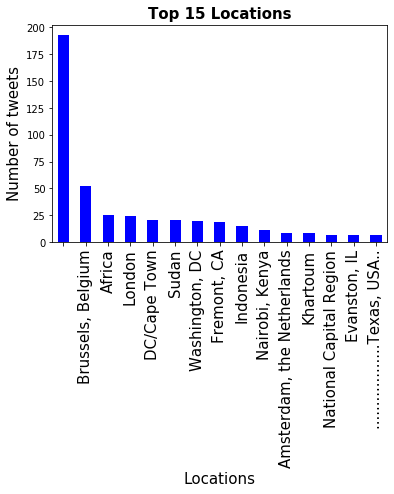

In [53]:
import matplotlib
import matplotlib.pyplot as plt

#Plot
tweets_by_country = df['location'].value_counts()

fig, ax = plt.subplots()
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=10)
ax.set_xlabel('Locations', fontsize=15)
ax.set_ylabel('Number of tweets' , fontsize=15)
ax.set_title('Top 15 Locations', fontsize=15, fontweight='bold')
tweets_by_country[:15].plot(ax=ax, kind='bar', color='blue')

Majority of the tweets have an unknown location specified. It could possibly be that the Sudanese people were anonymously tweeting so they are not in danger of being killed.

The next most tweeted locations about Sudan are Belgium, Africa, London, etc (as seen in the above graph).

We can do additional cleaning up of the data to carefully allocate the countries for those locations as you see the continent "Africa" and many others mentioned very vaguely.

### References:
- https://www.toptal.com/python/twitter-data-mining-using-python
- https://towardsdatascience.com/almost-real-time-twitter-sentiment-analysis-with-tweep-vader-f88ed5b93b1c